# Evaluate GCP Vertex AI Results

After Training a classifier, GCP Vertex AI shows the main evalution metrics and returns the confusion matrix.
Based on the confusion matrix, we validate the shown metrics and calculate additional ones.

## Prerequisites

In [1]:
import pandas as pd
from pathlib import Path
import json

## Import Data

In [2]:
data_dir = Path("data/")
cm_file = data_dir / "confusion_matrix_gcp_vertex_ai.csv"

In [3]:
cm_df = pd.read_csv(cm_file, index_col=0).fillna(0).astype(int)
cm_df.index.name = None
display(cm_df)

,Web,Inland,International,Etat,Wirtschaft,Sport,Wissenschaft,Kultur,Panorama
Web,166,1,2,0,7,0,1,2,3
Inland,1,77,0,0,9,0,2,1,6
International,2,0,125,0,3,0,0,1,7
Etat,3,1,3,46,0,1,0,5,1
Wirtschaft,8,2,5,0,122,1,1,1,7
Sport,0,0,0,0,0,113,0,0,1
Wissenschaft,3,0,1,1,0,0,54,0,1
Kultur,0,3,1,1,2,0,0,44,0
Panorama,0,12,12,0,3,1,4,1,146


## Convert Confusion Matrix into Predictions

In [4]:
pred_df = (cm_df
           .melt(ignore_index=False).reset_index()
           .rename(columns = {'index':'actual', 'variable':'predicted'})
           .loc[lambda x: x.index.repeat(x.value)].drop("value", axis=1)
          )
pred_df

,actual,predicted
0,Web,Web
0,Web,Web
0,Web,Web
0,Web,Web
0,Web,Web
...,...,...
80,Panorama,Panorama
80,Panorama,Panorama
80,Panorama,Panorama
80,Panorama,Panorama


### Plot Confusion Matrix

In [5]:
test_labels = pred_df.actual
pred_labels = pred_df.predicted
labels = sorted(cm_df.columns)

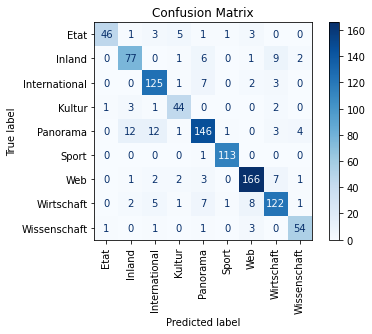

In [6]:
import sklearn.metrics as skm
import matplotlib.pyplot as plt

cm = skm.confusion_matrix(test_labels, pred_labels, labels=labels)
cmd = skm.ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix");

### Detailed Report

In [7]:
print(skm.classification_report(test_labels, pred_labels))

               precision    recall  f1-score   support

         Etat       0.96      0.77      0.85        60
       Inland       0.80      0.80      0.80        96
International       0.84      0.91      0.87       138
       Kultur       0.80      0.86      0.83        51
     Panorama       0.85      0.82      0.83       179
        Sport       0.97      0.99      0.98       114
          Web       0.91      0.91      0.91       182
   Wirtschaft       0.84      0.83      0.83       147
 Wissenschaft       0.87      0.90      0.89        60

     accuracy                           0.87      1027
    macro avg       0.87      0.87      0.87      1027
 weighted avg       0.87      0.87      0.87      1027



In [8]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, hamming_loss, matthews_corrcoef

print(f"{accuracy_score(test_labels, pred_labels):.4} accuracy")
print(f"{precision_score(test_labels, pred_labels, average='macro'):.4} precision (macro)")
print(f"{recall_score(test_labels, pred_labels, average='macro'):.4} recall (macro)")
print(f"{f1_score(test_labels, pred_labels, average='macro'):.4} f1 (marco)")
print(f"{f1_score(test_labels, pred_labels, average='weighted'):.4} f1 (weighted)")
print(f"{matthews_corrcoef(test_labels, pred_labels):.4} mcc")
print(f"{hamming_loss(test_labels, pred_labels):.4} hamming loss")

0.8695 accuracy
0.8707 precision (macro)
0.8651 recall (macro)
0.8664 f1 (marco)
0.8692 f1 (weighted)
0.85 mcc
0.1305 hamming loss
